In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.optimize import linear_sum_assignment

In [10]:
#Load the biomass history dataset
bio_hist_df = pd.read_csv('https://raw.githubusercontent.com/mamzeen/EcoSmart/main/Dataset_Shell/Biomass_History.csv')
bio_hist_df.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [3]:
# Drop the index column
#bio_hist_df = bio_hist_df.drop('Index', axis=1)

In [11]:
#Explore basic information about the Biomass History dataset
bio_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      2418 non-null   int64  
 1   Latitude   2418 non-null   float64
 2   Longitude  2418 non-null   float64
 3   2010       2418 non-null   float64
 4   2011       2418 non-null   float64
 5   2012       2418 non-null   float64
 6   2013       2418 non-null   float64
 7   2014       2418 non-null   float64
 8   2015       2418 non-null   float64
 9   2016       2418 non-null   float64
 10  2017       2418 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 207.9 KB


In [12]:
# Statistical summary of numerical columns
bio_hist_df.describe()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000
mean,1208.500000,22.506537,71.826215,144.401424,150.860247,109.468899,161.886430,157.954024,132.898633,113.089323,159.163367
std,698.160798,1.034936,1.389804,146.506351,142.264612,110.249714,180.337708,139.870466,129.689111,102.092570,158.993069
min,0.000000,20.154560,68.624190,0.000167,0.000433,0.000290,0.000532,0.000155,0.000072,0.000151,0.000191
25%,604.250000,21.685970,70.774060,23.449163,25.576084,22.711070,27.044554,31.514698,22.732275,22.658495,26.064368
50%,1208.500000,22.491970,71.888820,112.298855,126.291077,82.271317,117.662296,136.859337,106.789989,91.721931,120.519817
75%,1812.750000,23.297970,73.003570,207.689327,226.197079,163.512547,222.835739,241.965115,196.102222,177.136295,231.067348
max,2417.000000,24.668180,74.436820,883.691711,771.061646,871.800415,1232.853760,871.800415,771.061646,514.148987,883.691711


In [13]:
# Check for missing columns
bio_hist_df.isnull().sum()

Index        0
Latitude     0
Longitude    0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
dtype: int64

In [24]:
# Load Distance Matrix dataset
dist_matrix_df = pd.read_csv('https://raw.githubusercontent.com/mamzeen/EcoSmart/main/Dataset_Shell/Distance_Matrix.csv')
dist_matrix_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280


##Spatial Analysis##

In [20]:
# Let's calculate the sum of biomass availability across all years (i.e from 2010 to 2017)
bio_hist_df['total_biomass'] = bio_hist_df[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']].sum(axis=1)

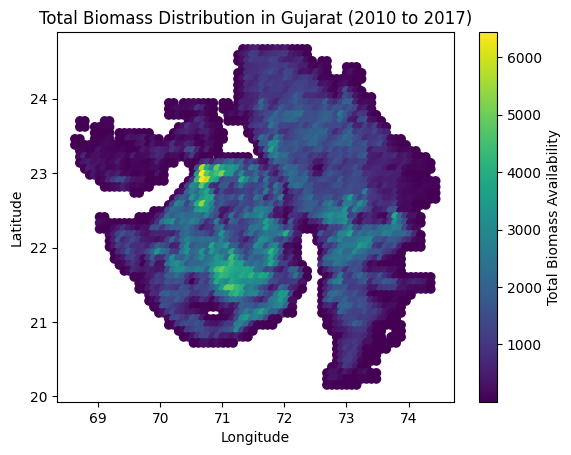

In [22]:
# Let's plot a scatter plot showing the spatial distribution of total biomass availability
plt.scatter(bio_hist_df['Longitude'], bio_hist_df['Latitude'], c=bio_hist_df['total_biomass'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Biomass Distribution in Gujarat (2010 to 2017)')
plt.colorbar(label='Total Biomass Availability')
plt.show()

##Identification of Optimal Asset Location##

In [25]:
# Let's calculate cost matrix based on the distance_matrix and total biomass availability
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
cost_matrix = dist_matrix_df.values

In [27]:
# Let's sum the biomass availability for all years and use it as the cost
biomass_availability = bio_hist_df[years].sum(axis=1).values
biomass_cost_matrix = np.outer(biomass_availability, np.ones(len(years)))

In [28]:
# Let's minimize transportation cost by leveraging Hungarian algorithm to solve the assignment problem
row_indices, col_indices = linear_sum_assignment(biomass_cost_matrix)

##Optimal Assignment##

In [29]:
# Let's print the optimal assignments using supply Chain Modeling
print('Optimal assignments:')
for i, j in zip(row_indices, col_indices):
    print(f'Harvesting Site {i+1} to Biorefinery {j+1}')

Optimal assignments:
Harvesting Site 206 to Biorefinery 8
Harvesting Site 277 to Biorefinery 3
Harvesting Site 282 to Biorefinery 1
Harvesting Site 415 to Biorefinery 6
Harvesting Site 524 to Biorefinery 2
Harvesting Site 774 to Biorefinery 4
Harvesting Site 1032 to Biorefinery 5
Harvesting Site 1956 to Biorefinery 7


##Constraints and Objectives##

In [30]:
# Let's calculate the total transportation cost based on the optimal assignments
total_transportation_cost = biomass_cost_matrix[row_indices, col_indices].sum()

In [ ]:
# Next, let's check if biomass demand for each biorefinery is met